### Predicting Total City Bike Rentals

#### Support Vector Machine Regressor & Decision Tree Regression with Kfold Cross Validation


created by John Ryan 03/10/2017




In [1]:
#import required libaries
import pandas as pd 
import numpy as np

In [2]:
#import the data
data = pd.read_csv("C://data//day.csv")

In [3]:
data.head(1)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   

   cnt  
0  985

In [4]:
data.shape

(731, 16)

#### Bike Rental System - DataFrame Information

- Each row represents one day and its corresponding features associated with it, such as season,  yr,  mnth, holiday,  weekday,  workingday,temp, atemp, hum, windspeed, casual  registered and a range of additional features that one might analyze to determine what might a person to take out a rental of a bike om a particular day of a week in a year. The target feature for the this regression analysis is "cnt" which identifies the total number of bike rentals for that day has thus helping to indicate popularity.
- We can see we have no categorical attributes present in the data.
- There are 16 attributes in total ([731 rows x 16 columns]>) 731 instances which is small amount of data to work with.
- data.info below gives a view of all the features present and give a quick description for example how many rows to we have, what are the data types and the number of non-null values

In [5]:
#data.info

#### Data Description

- the "std" row meaning standard deviation looks at how despersed the values are, ignoring the timedelta we see a difference in the size of the values between values which are of different scales.
- 25,50, 70% percentiles indicates the value below which a given % of observations in a group of observations fall.For example  25% of the rentals for the season are lower than 2, 50% lower than 3 and 75% lower than 3.



In [6]:
data.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

### Data Exploration

#### Histogram 

Shows the number of instances (vertical axis) that have a given range of values (horizontal axis)

some observations:
- These attributes look at they are ay complete different scales, we will need to tramform later with some type of feature scaling.

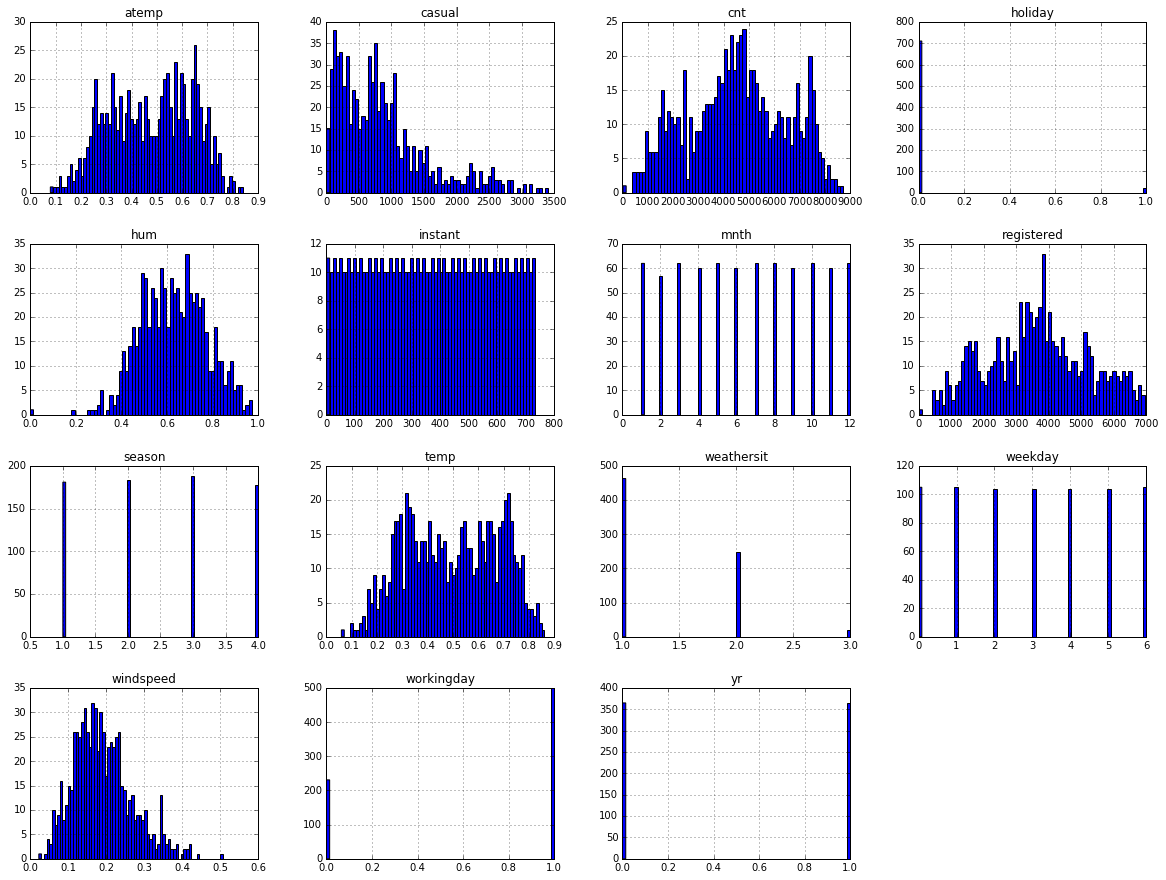

In [7]:
#creates a histogram with 70 bins for each feature in the data set
#we see a normal distribution for registered users renting bikes, 
#however the casual feature is sckewed to the right which needs toi be investigated futher with
#some possible transformation techniques applied.
import matplotlib.pyplot as plt
%matplotlib inline
data.hist(bins = 70, figsize = (20,15))
plt.show()

In [8]:
#Creating a Training, Test set using train_test_split
from sklearn.model_selection import train_test_split 
train_set, test_set = train_test_split(data, test_size=0.2,random_state=42)

In [9]:
#view the shape of the train set at 80%
train_set.shape

(584, 16)

In [10]:
#view the shape of the test set at 20%
test_set.shape

(147, 16)

In [ ]:
### Explore Data on a copy of the data

In [11]:
#This creates a copy of the train set for data exploration leaving the 
#original data frame untampered.
datacopy = train_set.copy()

### Visualize Important Features - Scatter plot

#### Total Count of Registered Bike Rental Users 

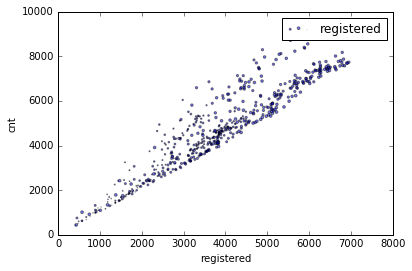

In [12]:
#creates a scatter plot of the registered bike rental users total count of rentals
#The graph of course inicates a clear linear relationship between our target and registered variables
datacopy.plot(kind="scatter", x="registered", y="cnt", alpha=0.5,
             s=datacopy["registered"]/100, label= "registered" )

#### Total Count of Casual Bike Rental Users

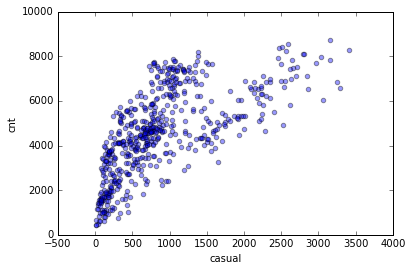

In [13]:

datacopy.plot(kind="scatter", x="casual", y="cnt", alpha=0.4)

#### Looking for insight from Correlations between variables

In [15]:
corr_matrix = datacopy.corr()
corr_matrix['cnt'].sort_values(ascending=False)

cnt           1.000000
registered    0.941568
casual        0.675277
instant       0.626033
atemp         0.625816
temp          0.622980
yr            0.550324
season        0.411395
mnth          0.302871
weekday       0.077513
workingday    0.065196
holiday      -0.078797
hum          -0.102155
windspeed    -0.214050
weathersit   -0.293297
Name: cnt, dtype: float64

#### Plotting the Correlation Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D1879B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D3586A0>]], dtype=object)

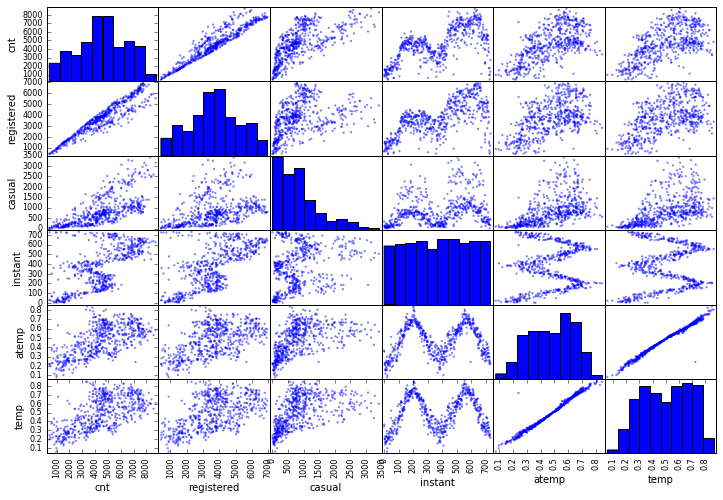

In [16]:
from pandas.plotting import scatter_matrix
attributes = ['cnt','registered','casual','instant','atemp','temp']
scatter_matrix(datacopy[attributes], figsize=(12,8))

### Feature Engineering /Transformation - Attribute Combination & Logarithms

#### 1. Interesting Attribute Combinations - Example

In [17]:
#weather situation per casual user, this combines both the weathersit & 
#casual variable to give an indictor of weather condition at time of casual bike rental. 
""""weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog """

datacopy["weathersit_per_casual_user"] =datacopy["weathersit"]/datacopy["casual"]
datacopy["weathersit_per_casual_user"].head(3)

682    0.006116
250    0.019608
336    0.001416
Name: weathersit_per_casual_user, dtype: float64

#### 2. Logarithms - logging the Casual variable 

logaritmic transformations make highly sckewed data less sckewed to improve the overall distribution of points across the variable.

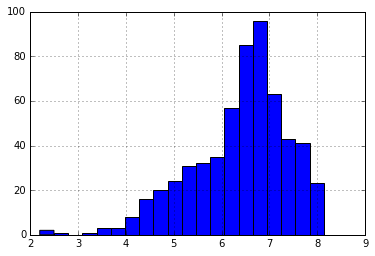

In [18]:
#1. Logarithms - logging the Casual variable 
#import numpy library for the computation of np.log and create resulting histogram
datacopy['casual_log'] = np.log(datacopy['casual'])
datacopy['casual_log'].hist(bins=20)

In [19]:
corr_matrix = datacopy.corr()
corr_matrix['cnt'].sort_values(ascending=False)

cnt                           1.000000
registered                    0.941568
casual_log                    0.767255
casual                        0.675277
instant                       0.626033
atemp                         0.625816
temp                          0.622980
yr                            0.550324
season                        0.411395
mnth                          0.302871
weekday                       0.077513
workingday                    0.065196
holiday                      -0.078797
hum                          -0.102155
windspeed                    -0.214050
weathersit                   -0.293297
weathersit_per_casual_user   -0.356938
Name: cnt, dtype: float64

#### Total Count of Casual Rental Users Logged - "casual_logged"

When logging the casual variable we see that transformation has improved the distribution and predictive power of the feature, we see a more linear pattern and relationship with the 'cnt' variable compared previous scatterplot before transformation.

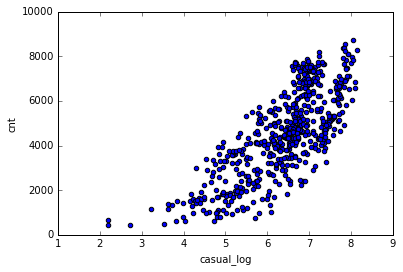

In [58]:
datacopy.plot(kind="scatter", x="casual_log", y="cnt")

### Data Preprocessing for Support Vector Machine Regressor

In [20]:
print("Number of NA values : {0}".format((data.shape[0] * data.shape[1]) - data.count().sum()))

Number of NA values : 0


In [21]:
#Assign the target variable to Y for later processing and 
#Remove the ID Column that is not needed 
y = data.cnt.values
x = data

In [22]:
#one hot encoder to convert categorical attributes to numeric for use of algorithms
from sklearn.preprocessing import LabelEncoder
for feature in x.columns:
    if x[feature].dtype=='object':
        le = LabelEncoder()
        x[feature] = le.fit_transform(x[feature])

In [23]:
#creating an inputer for use in a pipeline, this input missing values with the median value.
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit(x)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

#### Feature Scaling - Pipeline

"Standardize features by removing the mean and scaling to unit variance

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using the transform method.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

This scaler can also be applied to sparse CSR or CSC matrices by passing with_mean=False to avoid breaking the sparsity structure of the data." - http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [24]:
#creates pipeline for preprocessing data before model fitting, allows for 
#missing value inputation and standard scaling for new unseen data to enter the pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline_n = Pipeline([
        ('imputer', Imputer(strategy= "median")),
        ('st_scaler', StandardScaler()),
    ])
data_transform = pipeline_n.fit_transform(data)
data = pd.DataFrame(data_transform)
data.head(3)

0         1         2         3         4         5         6   \
0 -1.729683 -1.729683 -1.348213 -1.001369 -1.600161 -0.171981  1.498809   
1 -1.724944 -1.724944 -1.348213 -1.001369 -1.600161 -0.171981 -1.496077   
2 -1.720205 -1.720205 -1.348213 -1.001369 -1.600161 -0.171981 -0.996930   

         7         8         9         10        11        12        13  \
0 -1.471225  1.110427 -0.826662 -0.679946  1.250171 -0.387892 -0.753734   
1 -1.471225  1.110427 -0.721095 -0.740652  0.479113  0.749602 -1.045214   
2  0.679706 -0.726048 -1.634657 -1.749767 -1.339274  0.746632 -1.061246   

         14        15  
0 -1.925471 -1.817953  
1 -1.915209 -1.912999  
2 -1.556689 -1.629925

#### Train Test Split

In [25]:
#Cross - Validation - split the data into 70% training and the remainder for testing the model
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=0)

C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Build the Support Vector Machine Regressor

In [26]:
#import the support vector machine regression library from sklearn
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error# calls on the mse library from the sklearns model evaluation metrics
SVclf = SVR(C=1.0, epsilon=0.2)
SVclf

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
#fits the training data to the svr model and makes a prediction on the test set.
SVpredict = SVclf.fit(X_train,Y_train).predict(X_test)

### Training and Evaluating on the Training set  - Mean Squared Error - Root Mean Squared Error 

We see from our data summary table previously populated that the number of rentals have a range of between 22 - 8714, the rot mean squared error indicates how far away the predicted values are from the observed, identifying how far away the residuals are from a line of best fit. We see the the model populated an error of 2031.63 which is an overly strong model as we would like to see the rsme as low as possible. Next step is to try improve the model performance by choosing an alternative kernal or to develop a new model with better capabilities to generalize to give a higher predictive accurracy rate. 

In [33]:
#calculates the mean squared error for the observed values vs predicted values
Sv_mse = mean_squared_error(Y_test,treepredict)
Sv_mse

array([ 4127532.47271941])

In [35]:
#creates a calculation of the root mean squared error, i.e square root of mse
Sv_rmse = np.sqrt(Sv_mse)
Sv_rmse

array([ 2031.63295718])

### Build a Better model - Decision Tree Regression & K-fold Cross Validation

Rmse at 57.31 this is a much better model! However we need to carryout some k-fold cross-validation to evaluate the model performance further before selecting for future use. The k-fold cross validation randomly splits the training set into 10 distinct subsets called folds, then it train the decision tree 10 times choosing a diffrent fold for evaluation each time while training on the other 9 folds. This populates an array with 10 scores:

In [42]:
#import the decision tree regressor from sklearn
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor()
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [51]:
#Fit the training sets and make predictions on the split test data, remember 70% training 30% prediction
treepredict = treereg.fit(X_train,Y_train).predict(X_test)

In [52]:
#calcualte mse for tree
tree_mse = mean_squared_error(Y_test,treepredict)
tree_mse

3284.9590909090907

In [53]:
#calcuate rmse for tree
tree_rmse = np.sqrt(tree_mse)
tree_rmse

57.314562642570088

### Evaluate Decision Tree with Kfold Cross Validation

In [57]:
#import libaries for cross valiadation scoring.
#number of folds is set to default value of 10
#negative mean square error scoring method specified.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treereg, X_test, Y_test, scoring ="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([ 121.01859361,  100.63819084,  139.85918243,   92.3439716 ,
         67.63135368,   78.01660662,   59.3506529 ,  103.68286437,
         61.42771066,   81.4005249 ])

In [59]:
#define a function to analyse the crossvalidation scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(rmse_scores)

('Scores:', array([ 121.01859361,  100.63819084,  139.85918243,   92.3439716 ,
         67.63135368,   78.01660662,   59.3506529 ,  103.68286437,
         61.42771066,   81.4005249 ]))
('Mean:', 90.536965160429276)
('Standard deviation:', 24.949471364287415)


#### Analysis of Kfold Cross Validation
On review of the decision tree rmse scores wee see that the tree performance is not as good as we first indetified but still much better than the support vector regression. The cross validation score allows us to measure the precision of accurary of the model, with The Mean score of approximately 90.53 and a standard deviation of 24.94.

**Data Source:**

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal

Original Source: http://capitalbikeshare.com/system-data
Weather Information: http://www.freemeteo.com
Holiday Schedule: http://dchr.dc.gov/page/holiday-schedule

**Citation Request:**

Fanaee-T, Hadi, and Gama, Joao, 'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, [Web Link].

@article{
year={2013},
issn={2192-6352},
journal={Progress in Artificial Intelligence},
doi={10.1007/s13748-013-0040-3},
title={Event labeling combining ensemble detectors and background knowledge},
url={[Web Link]},
publisher={Springer Berlin Heidelberg},
keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
author={Fanaee-T, Hadi and Gama, Joao},
pages={1-15}
}